# Table of Contents

** Contributers: Mark Petersen **

1. [Introduction](#Introduction)
    1. [Modeling Sensor Uncertainty](#Modeling-Sensor-Uncertainty)
    2. [Modeling Uncertain Prior Infromation](#Modeling-Uncertain-Prior-Infromation)
    3. [Combining Information](#Combining-Information)



## Introduction

This notebook is based on the *Estimation I* by Ian Reid and will logically follow his paper. 

Estimation is the process of extracting data associated with a parameter to approximate its value when the true value is unknown. This sampled data is generally a random sample that comprises a subset of "population", and can be used to estimate a global characteristic. For example, let's say we want to know the male population in New York, and we randomly sample 25% of the population. The parameter that we are estimating is the male population in New York, and the sampled data comprises the subset that represents 25% of the population. We are using this subset to estimate the global characteristic or the entire population of New York. 

In engineering, we rely on sensors and models to tell us information about a system. Unfortunately, the sensors are noisy due to electrical noise, sampling error, calibration error, etc, and models are inaccurte. Some of the popular sensors in robotics are

* Rate Gyros
* Accelerometers
* Pressure Sensors
* Digital Compass/Magnetometer
* GPS

To deal with model uncertainties and sensor noise, we need to develop mathmatical tools to deal with these issues.

### Modeling Sensor Uncertainty

Consider a GPS sensor which measures only a scalar quantity, x-position. Taking a single sample at a certain x-position we can estimate the true value of the parameter x-position. 

If we take multiple samples at a certain x-position, we will begin to see a distribution or samples about the true value. An appropriate way to model this is using a probability density function which tells us how likely a particular measurement is, given the true value of the parameter. This can be written as $P(Z|X)$, where $Z$ is the measurement and $X$ is the parameter being estimated.

In this case the parameter x-position is a random variable and can be represented by different distributions. Some of the popular ones are shown below with their probability density function:

* Normal (Gaussian) Distribution
    * $f_x(x) = \frac{1}{\sqrt{2\pi\sigma^2}}e^{-(x-u)^2/2\sigma^2}$
* Exponential Distribution
    * $f_x(x) =  \begin{cases} \lambda e^{-\lambda x}    &\geq 0   \\ 0 & otherwise\end{cases}$ 
* Uniform Distribution
    * $f_x(x) = \begin{cases} \frac{1}{b-a} & a \leq x \leq b \\ 0 & otherwise \end{cases}$
    

The plots below show the probability density distribution for the various distribution provided that x-position = 5. These graphs might seem confusing at first to understand. The do not represent $P(Z|X)$ directly. To understand what they show, let's look at the uniform distribution. $P(4|5)$ is not $0.25$ rather it is an infentesimally small number. However, the $P(4 \leq Z < 6|5)$ = 0.5. We get that by integrating the pdf $\int_{4^-}^{6^-}f_x(x)$. 

Another way of thinking about this is with a uniform distribution the measured data is just as likely to be $4$ as it is $4.5$, but with a normal distribution the density is greater around the true value so the measured data is more likely to be closer to the true value than the large variances. 

Text(0.5,1,'exponential pdf')

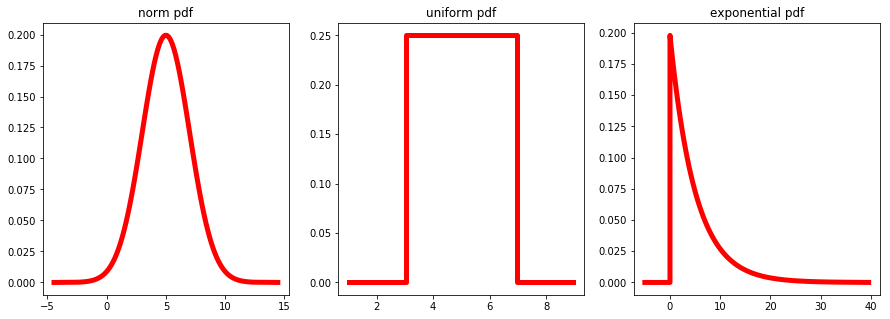

In [9]:
%matplotlib inline
from scipy.stats import uniform, norm, expon
import numpy as np
import matplotlib.pyplot as plt
fig, ax = plt.subplots(1,3)
fig.set_size_inches(15,5)

# Generate Normal Distribution
mean = 5
var = 2
rv_norm = norm(mean,var)
x_norm = np.linspace(rv_norm.ppf(0.0001),rv_norm.ppf(0.9999),100)
pdf_norm = rv_norm.pdf(x_norm)

pdf_norm = np.insert(pdf_norm,0,np.array(0))
pdf_norm = np.append(pdf_norm,np.array(0))
x_norm = np.insert(x_norm,0,np.array(x_norm[0]-var))
x_norm = np.append(x_norm,np.array(x_norm[-1]+var))

ax[0].plot(x_norm,pdf_norm, 'r-', lw=5)
ax[0].set_title('norm pdf')


# Generate uniform probability distribution function
width = 4
start = 5-width/2
rv_uniform = uniform(start, width)
x_uniform = np.linspace(rv_uniform.ppf(0.01), rv_uniform.ppf(0.99),100)
pdf_uniform = rv_uniform.pdf(x_uniform)

pdf_uniform = np.insert(pdf_uniform,0,np.array([0,0]))
pdf_uniform = np.append(pdf_uniform,np.array([0,0]))
x_uniform = np.insert(x_uniform,0,np.array([x_uniform[0]-width/2,x_uniform[0]]))
x_uniform = np.append(x_uniform,np.array([x_uniform[-1],x_uniform[-1]+width/2]))

ax[1].plot(x_uniform,pdf_uniform, 'r-', lw=5)
ax[1].set_title('uniform pdf')

# Generate exponential probability distribution function
start = 0
lam = 5
rv_expon = expon(start, lam)
x_expon = np.linspace(rv_expon.ppf(0.01), rv_expon.ppf(0.999),100)
pdf_expon = rv_expon.pdf(x_expon)

pdf_expon = np.insert(pdf_expon,0,np.array([0,0]))
pdf_expon = np.append(pdf_expon,np.array(0))
x_expon = np.insert(x_expon,0,np.array([x_expon[0]-lam,x_expon[0]]))
x_expon = np.append(x_expon,np.array(x_expon[-1]+lam))

ax[2].plot(x_expon,pdf_expon, 'r-', lw=5)
ax[2].set_title('exponential pdf')

### Modeling Uncertain Prior Infromation

In the previous section we modeled uncertainty in our GPS x-position measurement. We can appy the same idea to uncertain prior information. Let's say that the GPS is attached to a vehicle that can only move in one direction, but there are walls constraining the car's movement at $x=100$ and $x=0$. Using this prior information we can say that $P_x(x) \sim U(0,100) $. In other words, the car is equally likely to be anywhere within the bounds.

### Combining Information

